In [31]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import linregress
import scipy.stats as sts
from config import key_dict
gkey=key_dict["maps"]

In [32]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")
all_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [33]:
# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="windows-1252")
coordinates

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
250,ZW,-19.015438,29.154857,Zimbabwe
251,CG,-0.228021,15.827659,Congo [Republic]
252,CG,-0.228021,15.827659,Congo (Brazzaville)
253,CG,-0.228021,15.827659,Congo (Kinshasa)


In [34]:
# merge all_data and coordinates
merged_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,AF,33.93911,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,AF,33.93911,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,AF,33.93911,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN,AF,33.93911,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN,AF,33.93911,67.709953,Afghanistan


In [38]:
# gather columns we need 
clean_data=merged_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
clean_data

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
778,2016,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030
779,2017,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143
780,2018,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000


In [39]:
# check if there is null values
clean_data.isnull().sum()

Year                             0
Region                           0
Country                          0
latitude                         0
longitude                        0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [41]:
# group by region and country
country_group_df = clean_data.groupby(['Region','Country']).mean()
country_group_df.head()


Year   latitude   longitude  \
Region                     Country                                      
Australia and New Zealand  Australia    2017.0 -25.274398  133.775136   
                           New Zealand  2017.0 -40.900557  174.885971   
Central and Eastern Europe Albania      2017.0  41.153332   20.168331   
                           Armenia      2017.0  40.069099   45.038189   
                           Azerbaijan   2017.0  40.143105   47.576927   

                                        Happiness Rank  Happiness Score  \
Region                     Country                                        
Australia and New Zealand  Australia              10.0           7.2762   
                           New Zealand             8.2           7.3130   
Central and Eastern Europe Albania               106.4           4.7126   
                           Armenia               122.8           4.3932   
                           Azerbaijan             84.6           5.2292   

                                        Economy (GDP per Capita)    Family  \
Region                     Country                                           
Australia and New Zealand  Australia                    1.394885  1.409006   
                           New Zealand                  1.317509  1.439729   
Central and Eastern Europe Albania                      0.938633  0.754931   
                           Armenia                      0.839133  0.890873   
                           Azerbaijan                   1.073644  1.031750   

                                        Health (Life Expectancy)   Freedom  \
Region                     Country                                           
Australia and New Zealand  Australia                    0.914529  0.605043   
                           New Zealand                  0.891618  0.617782   
Central and Eastern Europe Albania                      0.787696  0.371898   
                           Armenia                      0.697851  0.216029   
                           Azerbaijan                   0.619653  0.380545   

                                        Trust (Government Corruption)  \
Region                     Country                                      
Australia and New Zealand  Australia                         0.314573   
                           New Zealand                       0.400015   
Central and Eastern Europe Albania                           0.043201   
                           Armenia                           0.038767   
                           Azerbaijan                        0.175756   

                                        Generosity  
Region                     Country                  
Australia and New Zealand  Australia      0.416078  
                           New Zealand    0.432805  
Central and Eastern Europe Albania        0.167887  
                           Armenia        0.082394  
                           Azerbaijan     0.049132

In [42]:
# heatmap for all the countries 
gmaps.configure(api_key=gkey)
fig=gmaps.figure()
locations=group_df[["latitude","longitude"]]
happiness=group_df["Happiness Score"]
heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
                               dissipating=False, 
                               max_intensity=group_df["Happiness Score"].max(), 
                               point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# find the top ten countries
top_ten=country_group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten


,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078


In [44]:
# mark top ten countries
coordinates=top_ten[["latitude","longitude"]]
top_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=top_ten["Country"],
                          stroke_color="green")
fig.add_layer(top_symbols)
fig
                    

Figure(layout=FigureLayout(height='420px'))

In [45]:
botomn_ten=country_group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293
1,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
2,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775
3,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
4,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749
5,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311
6,Sub-Saharan Africa,South Sudan,2017.50,12.862807,30.217636,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921


In [46]:
# mark bottom ten countries
coordinates=botomn_ten[["latitude","longitude"]]
botomn_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=botomn_ten["Country"],
                          stroke_color="blue")
fig.add_layer(botomn_symbols)
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# group by year
year_df = clean_data.groupby('Year')
year_df["Happiness Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


From the table above, we can tell the countries's happiness score does not seem to vary much along the five years. Then we try to see if there is change among the top five and botomn five countries.

In [70]:
group_df.sort_values(by="Happiness Score", ascending=False).head(5)

Year   latitude  longitude  Happiness Rank  \
Region         Country                                                     
Western Europe Denmark      2017.0  56.263920   9.501785             2.2   
               Norway       2017.0  60.472024   8.468946             2.8   
               Finland      2017.0  61.924110  25.748151             3.6   
               Switzerland  2017.0  46.818188   8.227512             3.6   
               Iceland      2017.0  64.963051 -19.020835             3.2   

                            Happiness Score  Economy (GDP per Capita)  \
Region         Country                                                  
Western Europe Denmark               7.5460                  1.396729   
               Norway                7.5410                  1.519381   
               Finland               7.5378                  1.356960   
               Switzerland           7.5114                  1.472164   
               Iceland               7.5110                  1.386523   

                              Family  Health (Life Expectancy)   Freedom  \
Region         Country                                                     
Western Europe Denmark      1.447688                  0.865249  0.625959   
               Norway       1.431075                  0.873333  0.638049   
               Finland      1.434429                  0.873836  0.621536   
               Switzerland  1.417332                  0.928318  0.620642   
               Iceland      1.492813                  0.917744  0.618035   

                            Trust (Government Corruption)  Generosity  
Region         Country                                                 
Western Europe Denmark                           0.429374    0.318876  
               Norway                            0.343951    0.328990  
               Finland                           0.398474    0.217783  
               Switzerland                       0.379763    0.277432  
               Iceland                           0.140145    0.419124

In [153]:
top_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078


In [196]:
country_list=top_ten["Country"].tolist()
year_change_df=pd.DataFrame(columns=["country"])
year_change_df["country"]=country_list
year_change_df
# country_list=top_ten["Country"].tolist()
# country_list.index("Denmark")

,country
0,Denmark
1,Norway
2,Finland
3,Switzerland
4,Iceland
5,Netherlands
6,Canada
7,Sweden
8,New Zealand
9,Australia


In [201]:
year_list=[2015,2016,2017,2018,2019]

for country in country_list:

    Country_data=clean_data.loc[(clean_data["Country"]==country)]
    for year in year_list:
        year_data=Country_data.loc[Country_data["Year"]==year]
        index=country_list.index(country)
        #year_change_df.loc[index,year]=year_data["Happiness Rank"].iloc[0]
        year_data=year_data.reset_index()
        year_change_df.loc[index,year]=year_data.loc[0,"Happiness Rank"]
    
year_change_df=year_change_df.set_index("country")


In [202]:
year_change_df

,2015,2016,2017,2018,2019
country,,,,,
Denmark,3.0,1.0,2.0,3.0,2.0
Norway,4.0,4.0,1.0,2.0,3.0
Finland,6.0,5.0,5.0,1.0,1.0
Switzerland,1.0,2.0,4.0,5.0,6.0
Iceland,2.0,3.0,3.0,4.0,4.0
Netherlands,7.0,7.0,6.0,6.0,5.0
Canada,5.0,6.0,7.0,7.0,9.0
Sweden,8.0,10.0,9.0,9.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0


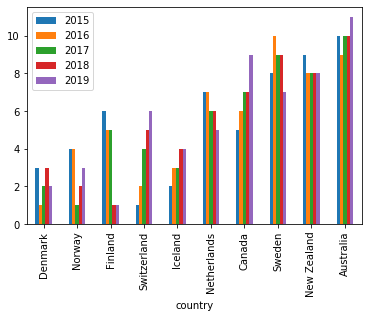

In [203]:
year_change_df.plot.bar()

note: Finland's Happiness rank is going up every year while that of Switzerland is going down each year. 

## Hypothesis: Economy contribute less in top Happy countries and more in botomn happy countries

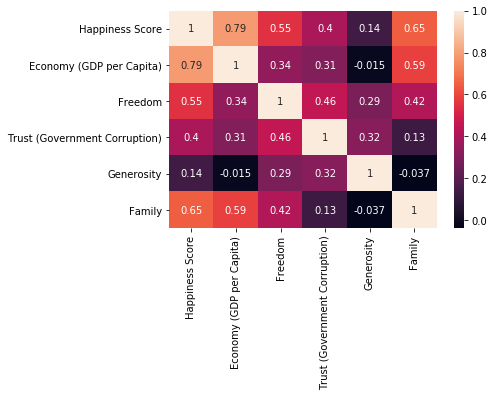

In [50]:
# Generate the correlation matrix for all the countries across the year
Happy_factors_df=clean_data[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

From the above table, we can tell the top three factors contributing to happiness score are: Economy(GDP per Capita),Family and Freedom

r value is: 0.7892839967173202
r squared value is: 0.6229692274740667


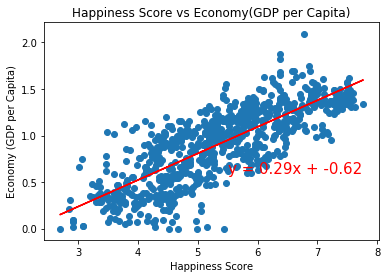

In [65]:
# scatter plot and regression between Happiness score and Economy
x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita)")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

Dots are pretty centered along the regression line.

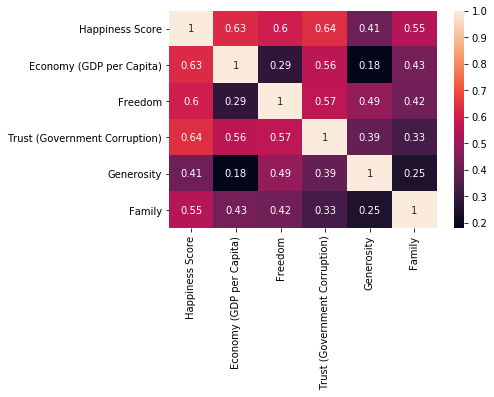

In [54]:
# Generate the correlation matrix for the top 100 countries 
Top_Hundred=country_group_df.sort_values(by=["Happiness Score"],ascending=False).head(100)
Top_Hundred=Top_Hundred.reset_index()
Happy_factors_df=Top_Hundred[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

For top 100 countries,r value between Economy and Happiness Score is lower than r value for all the countries and Trust as well as Freedom tend to play a bigger role.It means happiness score tend to increase with the increase of Trust or Freedom.

r value is: 0.6296641957747576
r squared value is: 0.39647699944067233


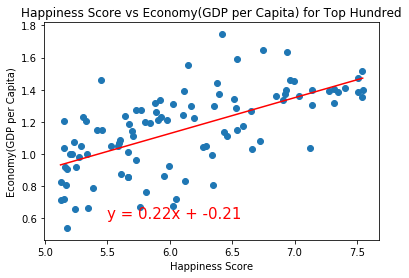

In [62]:
#regression between Happiness score and Economy for the top 100 countries
x_values = Top_Hundred["Happiness Score"]
y_values = Top_Hundred["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita) for Top Hundred")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()




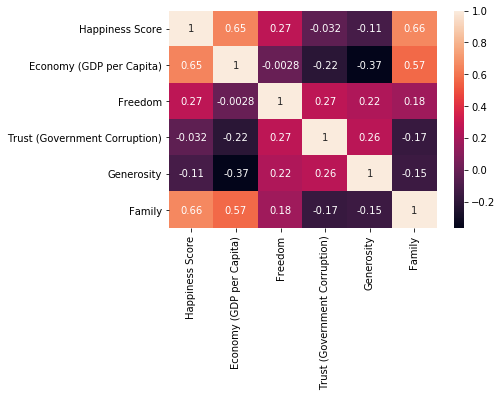

In [57]:
Botomn_Hundred=country_group_df.sort_values(by=["Happiness Score"],ascending=False).tail(100)
Botomn_Hundred=Botomn_Hundred.reset_index()
Happy_factors_df=Botomn_Hundred[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

For botomn 100 countries, besides Economy(GDP per Capita) and Family, other factors have rare relation with Happiness Score. With the same Economy or Family size, increas of other factors like trust or freedom does not necessaries bring high happiness score. 

r value is: 0.648182205560238
r squared value is: 0.4201401716049346


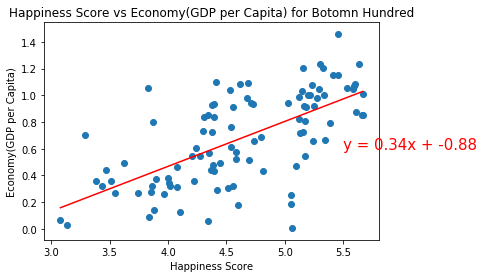

In [63]:
#regression between Happiness score and Economy for the top 100 countries
x_values = Botomn_Hundred["Happiness Score"]
y_values = Botomn_Hundred["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita) for Botomn Hundred")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.6512455337980784
r squared value is: 0.42412074529194405


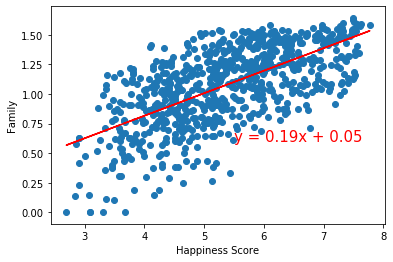

In [25]:
clean_data=clean_data.dropna()
x_values = clean_data["Happiness Score"]
y_values = clean_data["Family"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Family')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [66]:
# limitation: not normally distributed
sts.shapiro(clean_data["Happiness Score"])


(0.9851603507995605, 4.039274870137888e-07)

In [67]:
sts.normaltest(clean_data["Happiness Score"])

NormaltestResult(statistic=53.06994784033646, pvalue=2.9923145823956942e-12)

In [26]:
# find countries that have some missing data (didn't participate every year, etc)

In [19]:
# create summary table with statistics

In [ ]:
# find top 5 / bottom 5 for each year

In [ ]:
# find countries with biggest change in rankings/ratings

In [ ]:
# aggregate average for each country

# scatterplot matrix (as heatmap) to see correlations for each variable

# chart GDP vs Life expectancy (or other variables for a country)